In [1]:
#importing the required libraries
import sys
import numpy as np
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#Importing the MNIST data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

#Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [17]:
from sklearn import tree

for i in range(2, 20, 4):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    from sklearn.model_selection import cross_val_score
    train_acc = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    print("Max Depth -: " +str(i))
    print("1st fold accuracy- %.2f%%" %(100*train_acc[0]))  
    print("2nd fold accuracy- %.2f%%" %(100*train_acc[1]))
    print("3rd fold accuracy- %.2f%%" %(100*train_acc[2]))
    print("Average fold accuracy- %.2f%%" %((100*train_acc[2] + 100*train_acc[1] + 100*train_acc[0])/3))

Max Depth -: 2
1st fold accuracy- 32.58%
2nd fold accuracy- 35.83%
3rd fold accuracy- 33.25%
Average fold accuracy- 33.89%
Max Depth -: 6
1st fold accuracy- 75.58%
2nd fold accuracy- 74.77%
3rd fold accuracy- 74.55%
Average fold accuracy- 74.97%
Max Depth -: 10
1st fold accuracy- 86.31%
2nd fold accuracy- 86.79%
3rd fold accuracy- 85.53%
Average fold accuracy- 86.21%
Max Depth -: 14
1st fold accuracy- 87.14%
2nd fold accuracy- 87.18%
3rd fold accuracy- 86.87%
Average fold accuracy- 87.06%
Max Depth -: 18
1st fold accuracy- 86.92%
2nd fold accuracy- 87.21%
3rd fold accuracy- 86.73%
Average fold accuracy- 86.95%


In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=42)
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: %.2f%%" % (accuracy*100))

Training Accuracy: 87.61%


In [19]:
#Printing the confusion matrix for the training set

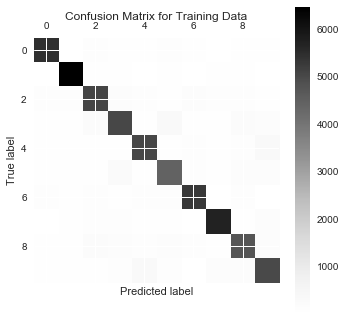

In [20]:
train_conf_mat = confusion_matrix(y_train,y_train_pred)
plt.matshow(train_conf_mat)
plt.title('Confusion Matrix for Training Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
#Printing the error values of the confusion matrix

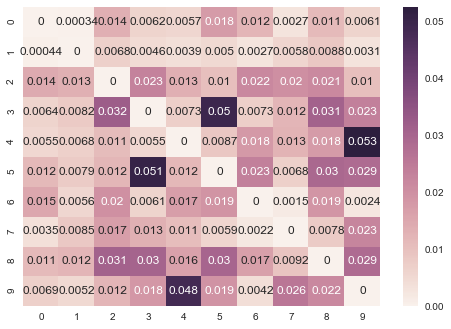

In [22]:
import seaborn as sns
val_row= train_conf_mat.sum(axis=1, keepdims=True)
train_err_conf_mat = train_conf_mat / val_row
np.fill_diagonal(train_err_conf_mat, 0)
ax = sns.heatmap(train_err_conf_mat,annot=True)
plt.show()

In [23]:
#Chose Decision Tree as the event model and performing the fit
#Testing the model
#Calculating the accuracy of the test data

In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Data Accuracy: %.2f%%" % (accuracy*100))

Test Data Accuracy: 88.55%


In [30]:
#Printing the  confusion matrix

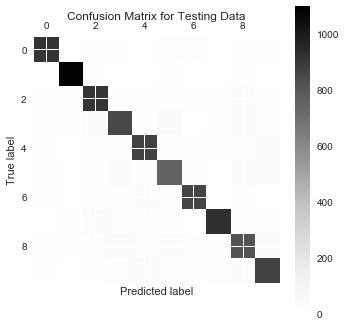

In [31]:
test_conf_mat = confusion_matrix(y_test,y_pred_test)
plt.matshow(test_conf_mat)
plt.title('Confusion Matrix for Testing Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
#Priting the error values of the confusion matrix

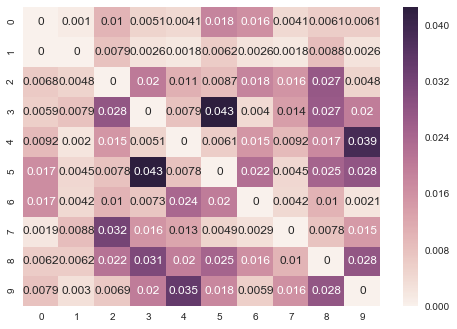

In [33]:
row_sums = test_conf_mat.sum(axis=1, keepdims=True)
norm_conf_mx = test_conf_mat / row_sums
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)
plt.show()